# Tester notebook for audio features

_Version: 1.0_

__Date: 14/03/2022__

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import soundfile as sf
import sys
sys.path.append("..")
import features
import util
import IPython.display as ipd

## Load audio and plot spectrogram

In [2]:
audio, rate = sf.read("../sound.wav")

In [3]:
ipd.Audio(audio, rate=rate)

In [4]:
stft, freq = util.get_stft(audio, rate, 2048)

In [5]:
mag = np.abs(stft)
num_frames = mag.shape[1]

<IPython.core.display.Javascript object>


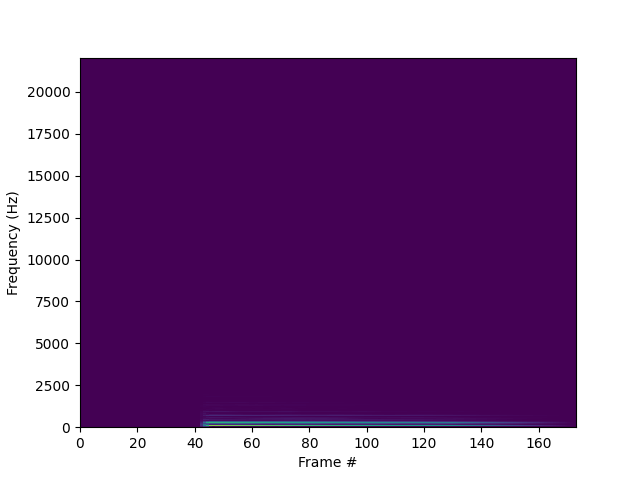

In [6]:
plt.figure(1)
plt.imshow(mag, origin='lower', aspect='auto', interpolation='none', extent=[0, num_frames, 0, rate/2])
plt.xlabel("Frame #")
plt.ylabel("Frequency (Hz)")
plt.show()

## Compute spectral features

In [7]:
cent = features.spectral_centroid(mag = mag, freq = freq)

/home/alexandre/AutoFX/source/notebooks/../features.py:33: RuntimeWarning: invalid value encountered in true_divide
  norm_mag = mag/np.sum(mag, axis=0)


<IPython.core.display.Javascript object>


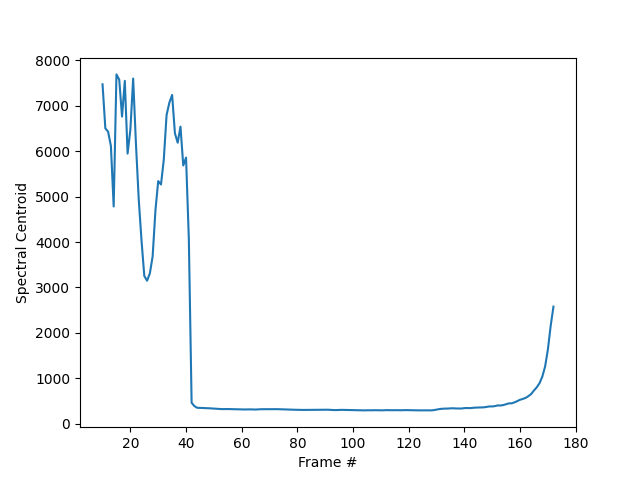

In [8]:
plt.figure(2)
plt.plot(np.arange(num_frames), cent)
plt.xlabel("Frame #")
plt.ylabel("Spectral Centroid")
plt.show()

In [9]:
spread = features.spectral_spread(mag = mag, freq = freq, cent = cent)

/home/alexandre/AutoFX/source/notebooks/../features.py:58: RuntimeWarning: invalid value encountered in true_divide
  norm_mag = mag/np.sum(mag, axis=0)


<IPython.core.display.Javascript object>


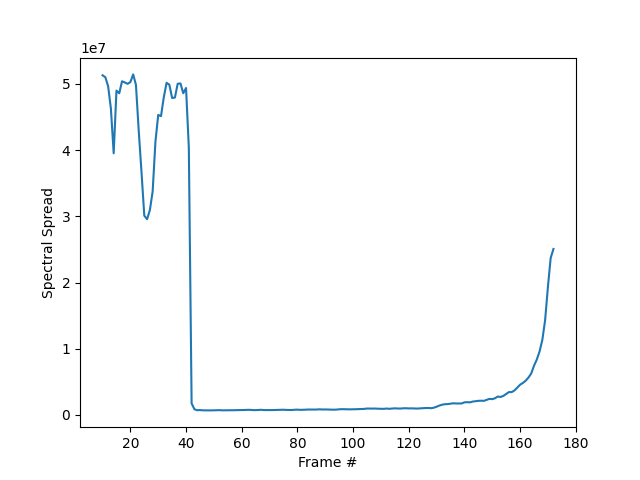

In [10]:
plt.figure(3)
plt.plot(np.arange(num_frames), spread)
plt.xlabel("Frame #")
plt.ylabel("Spectral Spread")
plt.show()

In [11]:
skew = features.spectral_skewness(mag = mag, freq = freq, cent = cent)

/home/alexandre/AutoFX/source/notebooks/../features.py:85: RuntimeWarning: invalid value encountered in true_divide
  norm_mag = mag/np.sum(mag, axis=0)


<IPython.core.display.Javascript object>


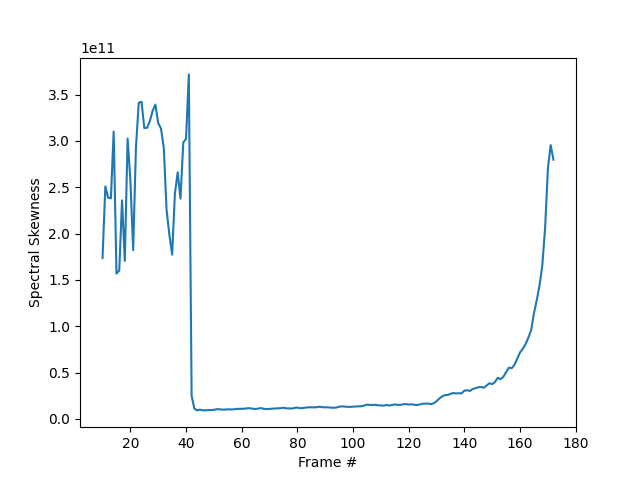

In [12]:
plt.figure(4)
plt.plot(np.arange(num_frames), skew)
plt.xlabel("Frame #")
plt.ylabel("Spectral Skewness")
plt.show()

In [13]:
kurt = features.spectral_kurtosis(mag = mag, freq = freq, cent = cent)

/home/alexandre/AutoFX/source/notebooks/../features.py:112: RuntimeWarning: invalid value encountered in true_divide
  norm_mag = mag/np.sum(mag, axis=0)


<IPython.core.display.Javascript object>


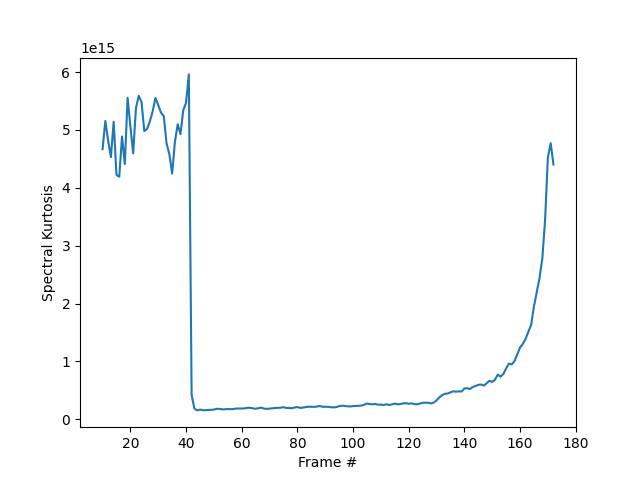

In [14]:
plt.figure(5)
plt.plot(np.arange(num_frames), kurt)
plt.xlabel("Frame #")
plt.ylabel("Spectral Kurtosis")
plt.show()

In [15]:
flux = features.spectral_flux(mag, q_norm = 2)

<IPython.core.display.Javascript object>


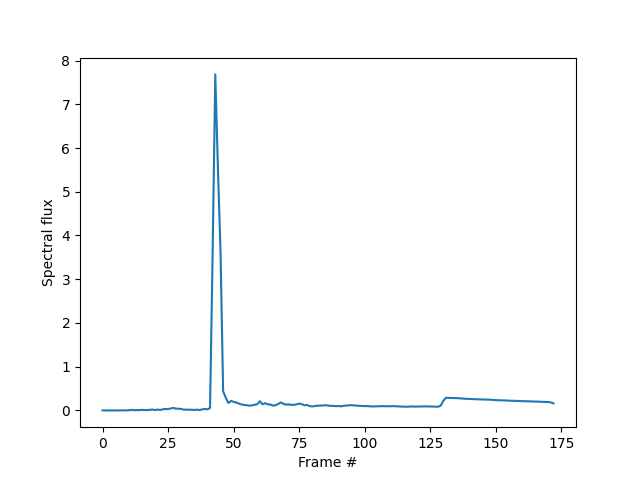

In [16]:
plt.figure(6)
plt.plot(np.arange(num_frames), flux)
plt.ylabel("Spectral flux")
plt.xlabel("Frame #")
plt.show()

In [17]:
rolloff = features.spectral_rolloff(mag, freq = freq)

<IPython.core.display.Javascript object>


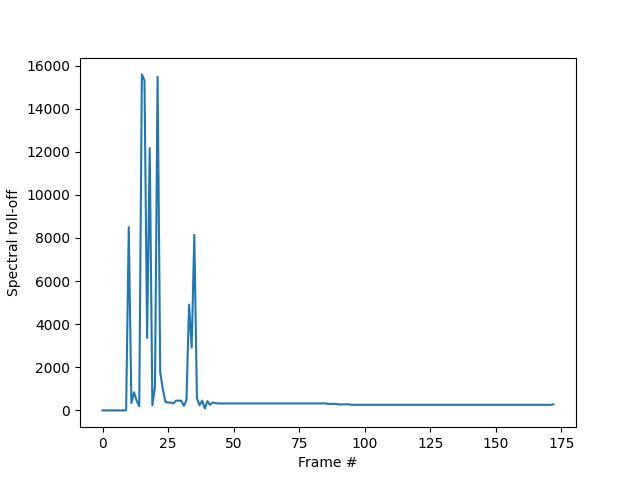

In [18]:
plt.figure(7)
plt.plot(np.arange(num_frames), rolloff)
plt.ylabel("Spectral roll-off")
plt.xlabel("Frame #")
plt.show()

In [19]:
slope = features.spectral_slope(mag, freq = freq)

/home/alexandre/AutoFX/source/notebooks/../features.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope[fr] = num/(denom * np.sum(mag[:, fr]))


<IPython.core.display.Javascript object>


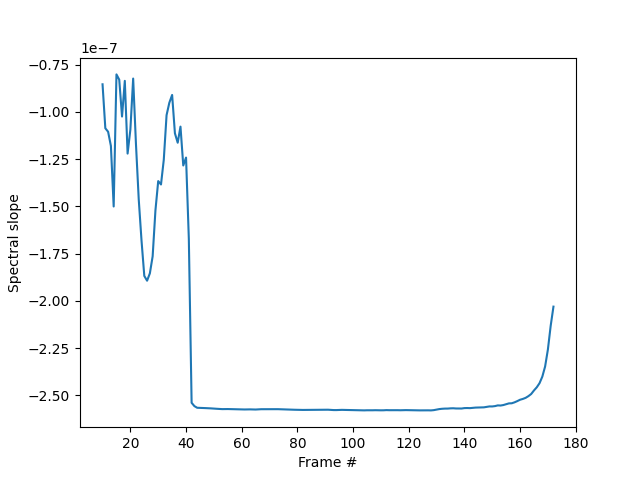

In [20]:
plt.figure(8)
plt.plot(np.arange(num_frames), slope)
plt.ylabel("Spectral slope")
plt.xlabel("Frame #")
plt.show()

In [21]:
flat = features.spectral_flatness(mag=mag)

/home/alexandre/AutoFX/source/notebooks/../features.py:17: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.mean(np.log(arr)))
/home/alexandre/AutoFX/source/notebooks/../features.py:226: RuntimeWarning: invalid value encountered in double_scalars
  flatness[fr, b] = _geom_mean(arr)/np.mean(arr)


<IPython.core.display.Javascript object>


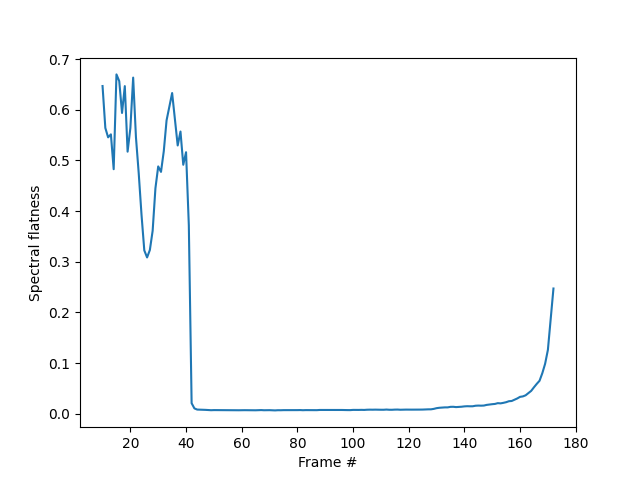

In [22]:
plt.figure(9)
plt.plot(np.arange(num_frames), flat)
plt.ylabel("Spectral flatness")
plt.xlabel("Frame #")
plt.show()

## Test with synthetic signals

In [23]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [24]:
x = np.arange(1025)
gauss = gaussian(x, 512, 128)
left_gauss = gaussian(x, 256, 128)
right_gauss = gaussian(x, 768, 128)

<IPython.core.display.Javascript object>


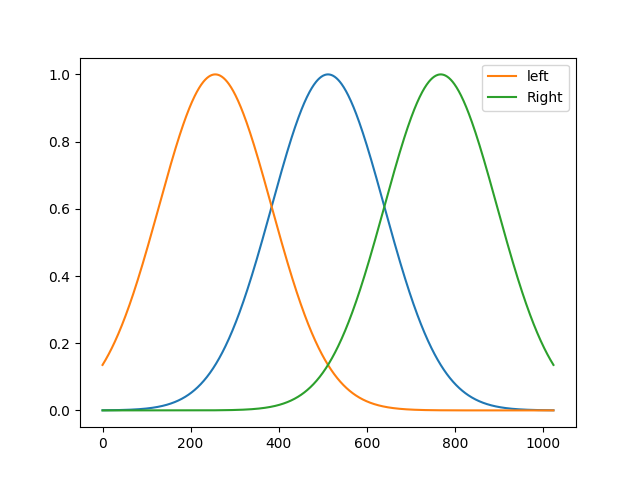

In [25]:
plt.figure(10)
plt.plot(x, gauss)
plt.plot(x, left_gauss, label="left")
plt.plot(x, right_gauss, label="Right")
plt.legend()
plt.show()

In [42]:
cent = features.spectral_centroid(mag=left_gauss, freq=freq)
print(f"Expected value: {freq[512]}, \nObtained value: {float(cent)}")

Expected value: 11025.0, 
Obtained value: 5663.557050012935


In [27]:
spread = features.spectral_spread(mag=gauss, freq=freq, cent=cent)
print(np.sqrt(spread))

[2754.79556332]


In [43]:
skew = features.spectral_skewness(mag = left_gauss, cent = cent, freq = freq)
print(skew)

[3.84567684e+09]


In [29]:
kurt = features.spectral_kurtosis(mag = gauss, cent = cent, freq = freq)
print(kurt/spread**2)

[2.98621821]


In [35]:
rolloff = features.spectral_rolloff(mag = gauss, freq = freq, threshold=0.8)
print(rolloff)

[[12661.5234375]]


<IPython.core.display.Javascript object>


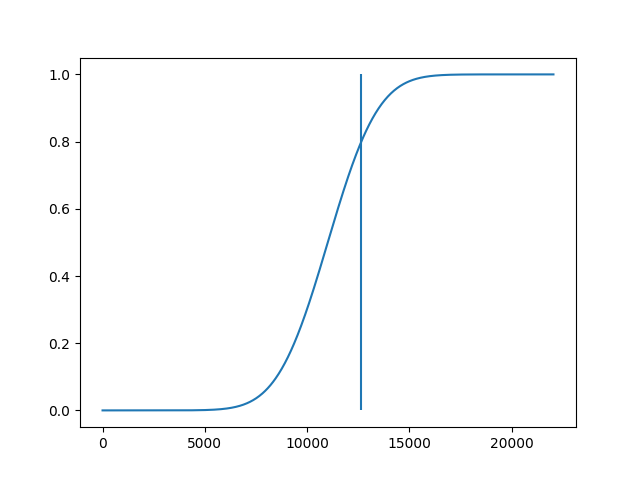

In [36]:
energy = np.cumsum(np.power(gauss,2))
plt.figure(11)
plt.plot(freq, energy/np.max(energy))
plt.vlines(rolloff, 0, 1)
plt.show()

In [39]:
slope = features.spectral_slope(mag = right_gauss, freq=freq)
print(slope)

[[1.2884705e-07]]
